In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
## Import necessary libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# Re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# Don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
# Useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

activation_52 (Activation)      (None, 12, 12, 160)  0           batch_normalization_52[0][0]     
__________________________________________________________________________________________________
activation_57 (Activation)      (None, 12, 12, 160)  0           batch_normalization_57[0][0]     
__________________________________________________________________________________________________
average_pooling2d_5 (AveragePoo (None, 12, 12, 768)  0           mixed5[0][0]                     
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 12, 12, 192)  147456      mixed5[0][0]                     
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 12, 12, 192)  215040      activation_52[0][0]              
__________________________________________________________________________________________________
conv2d_58 

In [10]:
# Tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [14]:
# Fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\laboni\anaconda3\envs\tomatoleafclassification\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
574/574 [==============================] - 1994s 3s/step - loss: 3.9703 - accuracy: 0.5862 - val_loss: 3.2730 - val_accuracy: 0.7088
Epoch 2/10
574/574 [==============================] - 1942s 3s/step - loss: 2.2683 - accuracy: 0.7800 - val_loss: 2.5620 - val_accuracy: 0.7874
Epoch 3/10
574/574 [==============================] - 2197s 4s/step - loss: 2.0045 - accuracy: 0.8198 - val_loss: 2.0169 - val_accuracy: 0.8275
Epoch 4/10
574/574 [==============================] - 2305s 4s/step - loss: 1.9020 - accuracy: 0.8426 - val_loss: 3.4476 - val_accuracy: 0.7677
Epoch 5/10
574/574 [==============================] - 2105s 4s/step - loss: 1.9285 - accuracy: 0.8480 - val_loss: 3.3108 - val_accuracy: 0.7880
Epoch 6/10
574/574 [==============================] - 1925s 3s/step - loss: 1.6661 - accuracy: 0.8727 - val_loss: 2.1817 - val_accuracy: 0.8530
Epoch 7/10
574/574 [==============================] - 1914s 3s/step - loss: 1.4319 - accuracy: 0.8889 - val_loss: 3.2781 - val_accuracy:

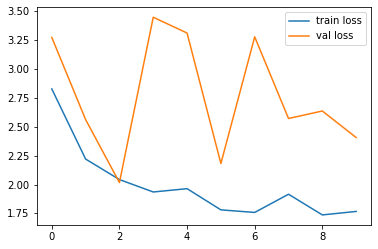

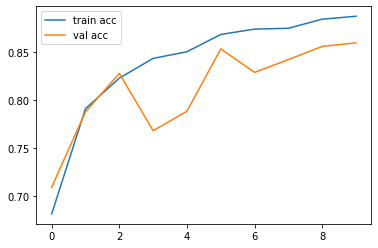

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# Save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:
y_pred = model.predict(test_set)

In [18]:
y_pred

array([[0.00000000e+00, 3.75385487e-13, 1.98716567e-24, ...,
        1.46629078e-30, 7.34322210e-38, 3.38169609e-27],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.09621845e-38, 0.00000000e+00],
       [7.77363179e-24, 2.57380130e-15, 4.55097347e-01, ...,
        0.00000000e+00, 1.61297321e-16, 1.46104915e-08],
       ...,
       [1.00000000e+00, 6.93371142e-27, 9.71894791e-32, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.26608890e-09, 1.48112067e-12, ...,
        1.84752318e-26, 6.34161822e-18, 1.46388710e-01],
       [0.00000000e+00, 1.00000000e+00, 3.78848191e-17, ...,
        0.00000000e+00, 4.94325473e-27, 0.00000000e+00]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([3, 7, 6, ..., 0, 6, 1], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [23]:
img=image.load_img('Datasets/test/Tomato___Bacterial_spot/ABC.JPG',target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[145., 141., 142.],
        [145., 141., 142.],
        [135., 131., 132.],
        ...,
        [140., 134., 134.],
        [137., 131., 131.],
        [141., 135., 135.]],

       [[148., 144., 145.],
        [144., 140., 141.],
        [141., 137., 138.],
        ...,
        [143., 137., 137.],
        [137., 131., 131.],
        [139., 133., 133.]],

       [[147., 143., 144.],
        [138., 134., 135.],
        [143., 139., 140.],
        ...,
        [144., 138., 138.],
        [140., 134., 134.],
        [143., 137., 137.]],

       ...,

       [[182., 180., 181.],
        [182., 180., 181.],
        [181., 179., 180.],
        ...,
        [195., 193., 194.],
        [194., 192., 193.],
        [193., 191., 192.]],

       [[180., 178., 179.],
        [179., 177., 178.],
        [179., 177., 178.],
        ...,
        [196., 194., 195.],
        [194., 192., 193.],
        [192., 190., 191.]],

       [[180., 178., 179.],
        [179., 177., 178.],
        [179., 1

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
img_data

array([[[[-0.9955402 , -0.9956632 , -0.99563247],
         [-0.9955402 , -0.9956632 , -0.99563247],
         [-0.99584776, -0.9959708 , -0.99594   ],
         ...,
         [-0.995694  , -0.9958785 , -0.9958785 ],
         [-0.99578625, -0.9959708 , -0.9959708 ],
         [-0.9956632 , -0.99584776, -0.99584776]],

        [[-0.99544793, -0.99557096, -0.9955402 ],
         [-0.99557096, -0.995694  , -0.9956632 ],
         [-0.9956632 , -0.99578625, -0.9957555 ],
         ...,
         [-0.9956017 , -0.99578625, -0.99578625],
         [-0.99578625, -0.9959708 , -0.9959708 ],
         [-0.99572474, -0.9959093 , -0.9959093 ]],

        [[-0.9954787 , -0.9956017 , -0.99557096],
         [-0.9957555 , -0.9958785 , -0.99584776],
         [-0.9956017 , -0.99572474, -0.995694  ],
         ...,
         [-0.99557096, -0.9957555 , -0.9957555 ],
         [-0.995694  , -0.9958785 , -0.9958785 ],
         [-0.9956017 , -0.99578625, -0.99578625]],

        ...,

        [[-0.99440217, -0.9944637 , -0

In [29]:
model.predict(img_data)

array([[4.1725437e-25, 7.2299757e-09, 9.9999547e-01, 1.7583504e-15,
        6.0207172e-13, 5.5923895e-18, 1.6993884e-16, 1.8799668e-25,
        4.5858214e-06, 1.1805919e-13]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [31]:
a==1

array([False])